In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("mobile_prices.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
df.shape

(2000, 21)

In [3]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [6]:
X = df.copy()
y = X.pop("price_range")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [7]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

ram           0.846430
px_height     0.026130
four_g        0.017648
int_memory    0.009264
talk_time     0.000590
m_dep         0.000000
three_g       0.000000
Name: MI Scores, dtype: float64

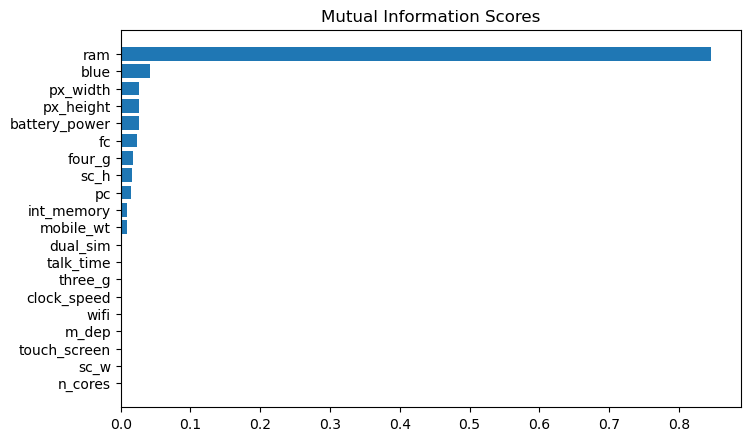

In [8]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [9]:
from sklearn.decomposition import PCA

In [10]:
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA(0.95)
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

In [11]:
X = df.copy()
y = X.pop("price_range")

pca, X_pca, loadings = apply_pca(X)

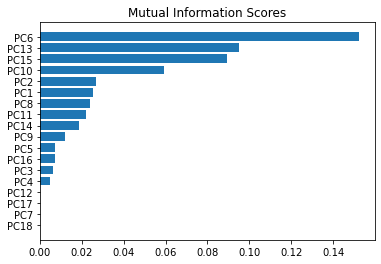

In [12]:
discrete_features = False
mi_scores = make_mi_scores(X_pca, y, discrete_features)
plot_mi_scores(mi_scores)

In [13]:
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.323416,-2.616240,-0.587586,1.255462,-0.434093,-1.027100,1.874760,-0.016009,-0.975910,1.417737,0.496102,-0.929173,-0.204719,0.676046,1.052115,-1.714821,-0.695351,-0.267051
1,-1.997840,0.572693,0.344593,-1.113498,0.573300,1.250081,-0.438500,-0.075092,-0.315013,-1.029199,-1.301443,0.519193,0.722937,1.061128,-1.198484,0.422538,0.513823,1.391448
2,-1.301140,0.190053,0.085419,-1.975992,0.610368,0.688165,-1.180006,-0.529823,-1.130674,-1.377564,-1.469721,0.018755,0.487584,1.377361,-0.640827,-0.011962,0.494864,-0.029523
3,-1.149123,-0.274313,1.666424,-0.234353,-0.550137,0.229177,-0.915083,0.628854,-1.604707,-1.191965,0.934950,-0.243742,-0.800949,0.194854,0.329290,-2.043566,0.299556,0.121443
4,1.636085,1.290968,-0.296005,-1.830760,-1.755207,1.063333,-0.165035,0.578965,0.973475,-0.081502,-0.670264,0.427633,1.231076,0.151554,-0.849403,-0.149798,0.284064,-0.869736


In [14]:
drop = [
    "wifi",
    "blue",
    "touch_screen",
    "three_g",
    "four_g",
    "sc_h",
    "dual_sim",
    "clock_speed",
    "talk_time"
]

In [15]:
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.323416,-2.616240,-0.587586,1.255462,-0.434093,-1.027100,1.874760,-0.016009,-0.975910,1.417737,0.496102,-0.929173,-0.204719,0.676046,1.052115,-1.714821,-0.695351,-0.267051
1,-1.997840,0.572693,0.344593,-1.113498,0.573300,1.250081,-0.438500,-0.075092,-0.315013,-1.029199,-1.301443,0.519193,0.722937,1.061128,-1.198484,0.422538,0.513823,1.391448
2,-1.301140,0.190053,0.085419,-1.975992,0.610368,0.688165,-1.180006,-0.529823,-1.130674,-1.377564,-1.469721,0.018755,0.487584,1.377361,-0.640827,-0.011962,0.494864,-0.029523
3,-1.149123,-0.274313,1.666424,-0.234353,-0.550137,0.229177,-0.915083,0.628854,-1.604707,-1.191965,0.934950,-0.243742,-0.800949,0.194854,0.329290,-2.043566,0.299556,0.121443
4,1.636085,1.290968,-0.296005,-1.830760,-1.755207,1.063333,-0.165035,0.578965,0.973475,-0.081502,-0.670264,0.427633,1.231076,0.151554,-0.849403,-0.149798,0.284064,-0.869736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.903771,0.581633,0.652547,-1.878158,-0.899037,-0.743839,-1.939852,-1.165978,-1.073168,-0.768663,-0.977121,2.095077,0.858080,0.768637,0.815580,-0.641191,0.391124,0.359272
1996,-1.445100,-0.839374,1.169080,-0.737235,-0.138192,0.811630,-0.449762,1.521145,-0.126227,2.625497,-0.222349,0.033715,0.892085,-0.751615,0.365661,0.992546,-1.192350,0.201154
1997,-1.255027,-0.165991,-0.746896,-2.029522,-0.078982,0.357683,-0.855925,-0.832008,-0.043699,-0.338627,-0.070670,0.707859,-1.919672,-0.093910,-1.375292,2.017168,0.210130,0.250130
1998,-1.223688,0.949857,-0.800076,1.597582,-1.482064,-1.088556,0.305136,-0.798021,1.643146,1.337779,0.126513,-0.603876,1.287382,-0.061400,0.561736,0.923947,0.398257,-0.185168


In [16]:
X_pca2 = X_pca[["PC6","PC13","PC15","PC10"]]
X_pca2.head()

,PC6,PC13,PC15,PC10
0,-1.027100,-0.204719,1.052115,1.417737
1,1.250081,0.722937,-1.198484,-1.029199
2,0.688165,0.487584,-0.640827,-1.377564
3,0.229177,-0.800949,0.329290,-1.191965
4,1.063333,1.231076,-0.849403,-0.081502


In [17]:
df2 = df.drop(drop, axis=1)
df2.head()

,battery_power,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_w,price_range
0,842,1,7,0.6,188,2,2,20,756,2549,7,1
1,1021,0,53,0.7,136,3,6,905,1988,2631,3,2
2,563,2,41,0.9,145,5,6,1263,1716,2603,2,2
3,615,0,10,0.8,131,6,9,1216,1786,2769,8,2
4,1821,13,44,0.6,141,2,14,1208,1212,1411,2,1


In [18]:
X_pca2

,PC6,PC13,PC15,PC10
0,-1.027100,-0.204719,1.052115,1.417737
1,1.250081,0.722937,-1.198484,-1.029199
2,0.688165,0.487584,-0.640827,-1.377564
3,0.229177,-0.800949,0.329290,-1.191965
4,1.063333,1.231076,-0.849403,-0.081502
...,...,...,...,...
1995,-0.743839,0.858080,0.815580,-0.768663
1996,0.811630,0.892085,0.365661,2.625497
1997,0.357683,-1.919672,-1.375292,-0.338627
1998,-1.088556,1.287382,0.561736,1.337779


In [19]:
X_pca2.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df3 = pd.concat([df2, X_pca2], axis=1)
df3.head()

,battery_power,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_w,price_range,PC6,PC13,PC15,PC10
0,842,1,7,0.6,188,2,2,20,756,2549,7,1,-1.027100,-0.204719,1.052115,1.417737
1,1021,0,53,0.7,136,3,6,905,1988,2631,3,2,1.250081,0.722937,-1.198484,-1.029199
2,563,2,41,0.9,145,5,6,1263,1716,2603,2,2,0.688165,0.487584,-0.640827,-1.377564
3,615,0,10,0.8,131,6,9,1216,1786,2769,8,2,0.229177,-0.800949,0.329290,-1.191965
4,1821,13,44,0.6,141,2,14,1208,1212,1411,2,1,1.063333,1.231076,-0.849403,-0.081502


In [21]:
X_train = df3.drop(['price_range'], axis='columns')
y_train = df3['price_range']

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [23]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [24]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_result = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_result

,model,best_score,best_params
0,svm,0.9705,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.8065,{'n_estimators': 10}
2,logistic_regression,0.8095,{'C': 5}
